In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
tips = sbn.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/home/long/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


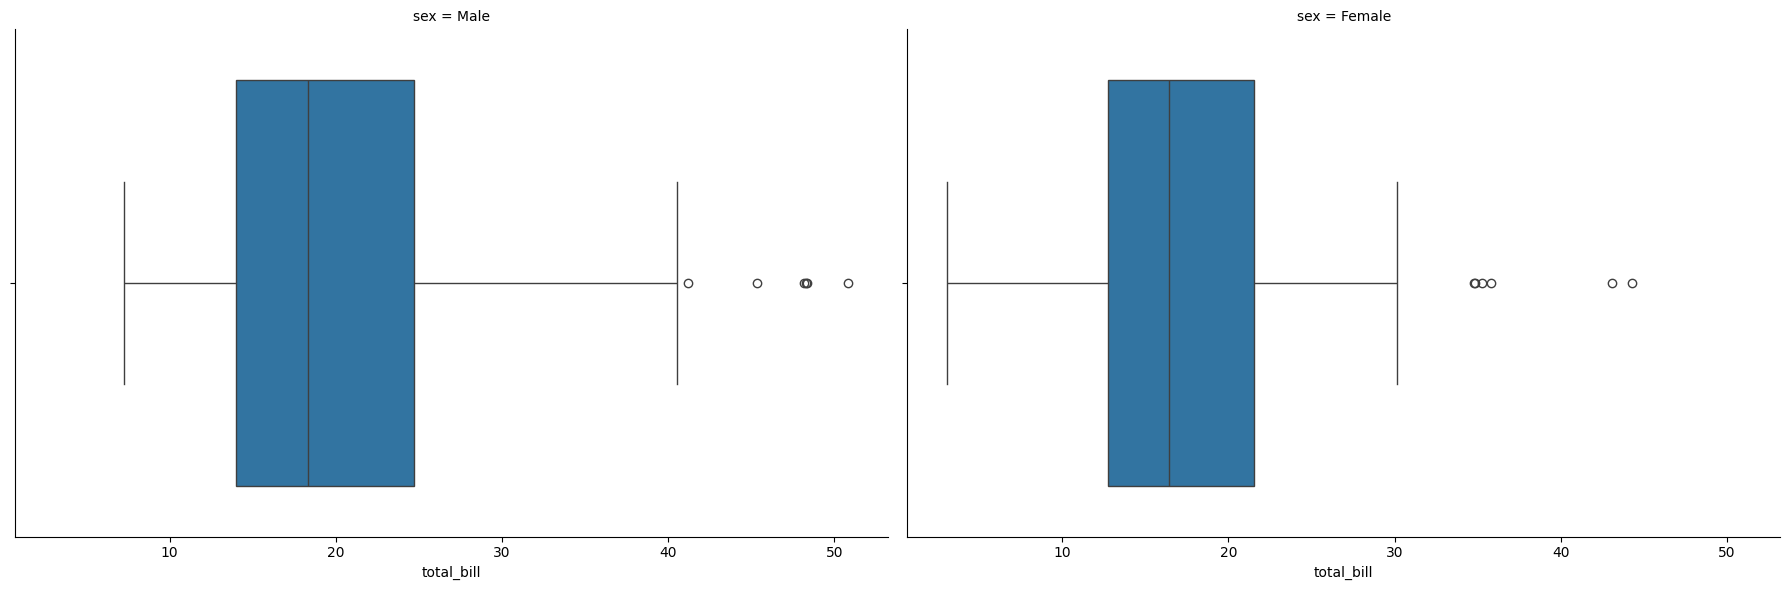

In [11]:
gr1 = sbn.FacetGrid(data=tips, col='sex', height=6, aspect=1.5) 
#Tạo một Facet grid dựa trên dataset là tips, chia thành các cột theo sex
#Vì sex ở đây chỉ có Male hoặc Female, nên tạo được 2 grid nằm trên 2 cột khác nhau
#height và aspect để thay đổi bề  ngang và bề  dọc của grid

gr1.map(sbn.boxplot, 'total_bill') #Vẽ boxplot của total_bill trong tips, nhận thấy hai boxplot nằm trên hai cột giới tính khác nhau

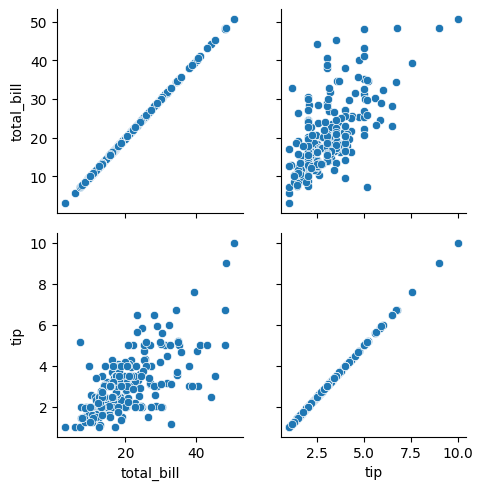

In [12]:
#Vẽ scatterplot giữa total bill và tip trong dataset là tips, dùng PairGrid
#PairGrid cũng giống FacetGrid nhưng dùng để  vẽ những nhóm dữ liệu bắt cặp nhau, như tương quan X~Y

gr2 = sbn.PairGrid(data=tips, vars=['total_bill','tip']) #Tạo PairGrid, vars để chỉ ra những biến được dùng để vẽ
gr2.map(sbn.scatterplot) #Vẽ scatter plot
plt.show()

In [13]:
#--------------DATASET = Diamond---------------------------#

In [14]:
dmd = sbn.load_dataset('diamonds')

In [16]:
dmd.shape

(53940, 10)

In [17]:
dmd.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


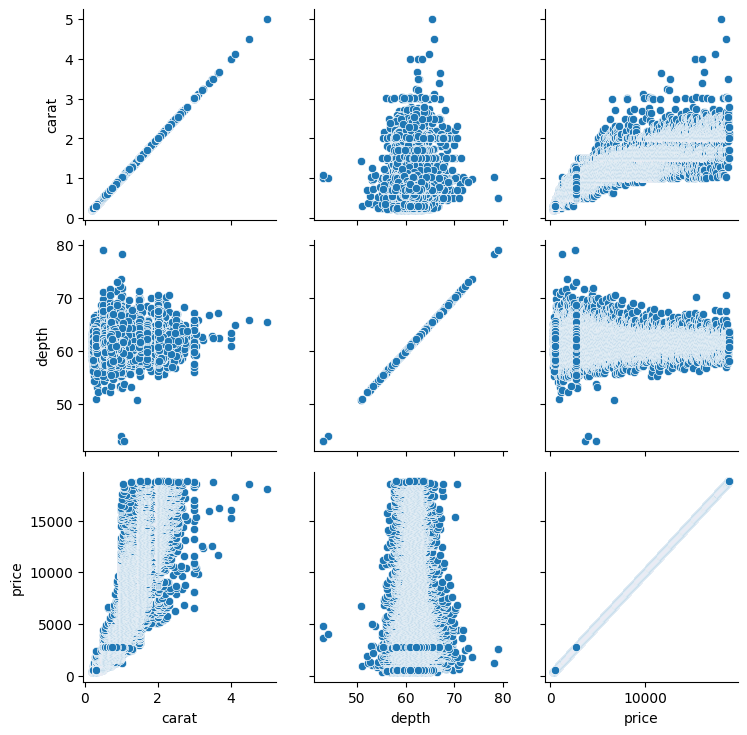

In [22]:
gr3 = sbn.PairGrid(data=dmd, vars=['carat','depth','price'])
gr3.map(sbn.scatterplot);

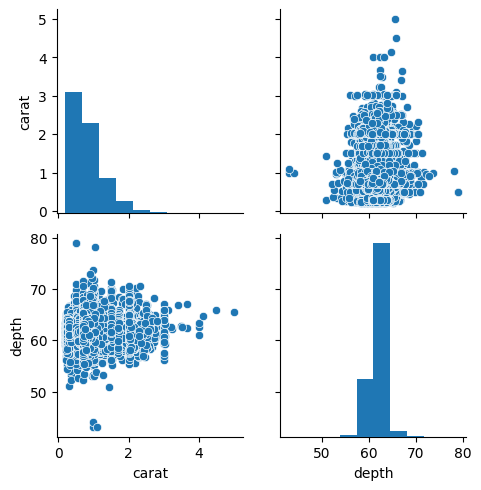

In [24]:
#Chỉ định cụ thể  vẽ biểu đồ gì trên đường chéo của PairGrid
gr4 = sbn.PairGrid(data=dmd, vars=['carat','depth'])
gr4.map_diag(plt.hist) #Trên đường chéo thì vẽ histogram
gr4.map_offdiag(sbn.scatterplot); #Không nằm trên đường chéo thì vẽ scatter plot

/home/long/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1886: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(self.x, **orient_kw_x, **kwargs)
/home/long/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1892: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(self.y, **orient_kw_y, **kwargs)


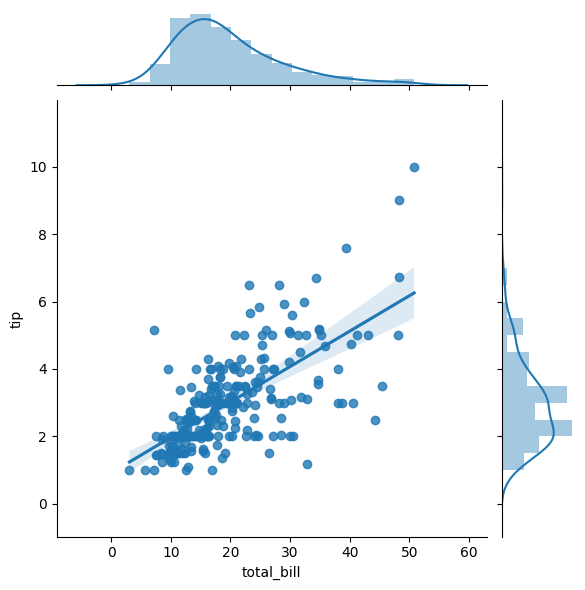

In [35]:
#JointGrid để  kết hợp biểu đồ đơn biến lẫn hai biến
gr5 = sbn.JointGrid(data=tips,x='total_bill',y='tip')
gr5.plot(sbn.regplot,sbn.distplot) #Điền sbn.regplot vào trước để vẽ regplot cho tương quan giữa total_bill và tip, biểu đồ nằm giữa
                #Điền sbn.distplot vào sau để  vẽ histogram kèm density line cho từng biến đơn total_bill và tip, biểu đồ nằm hai bên
plt.show()

<Axes: xlabel='carat', ylabel='price'>

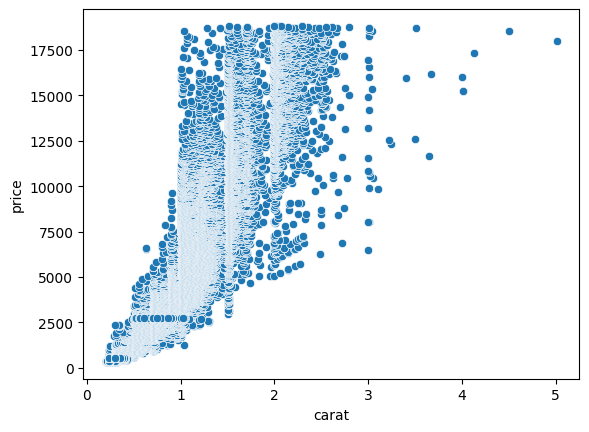

In [36]:
#----------------Xử lý khi mẫu nhiều quá----------------#
sbn.scatterplot(data=dmd, x='carat',y='price'); #Do quá nhiều điểm chồng lên nhau, nên nhìn độ thị rất khó quan sát

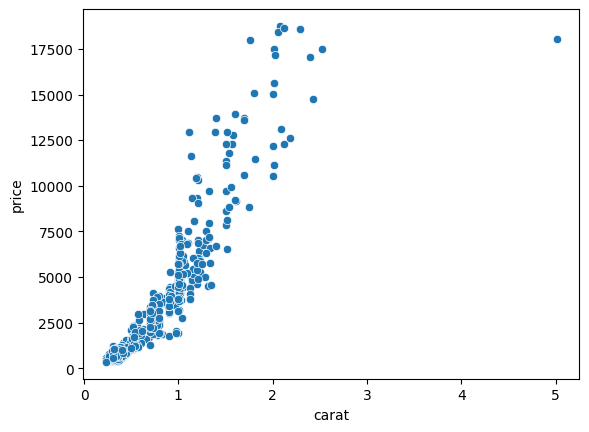

In [37]:
sbn.scatterplot(data=dmd.sample(500), x='carat',y='price'); #Chỉ lấy ngẫu nhiên 500 quan sát trong dataset dmd để vẽ, dễ quan sát hơn

/tmp/ipykernel_6235/1463294263.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(dmd.price);


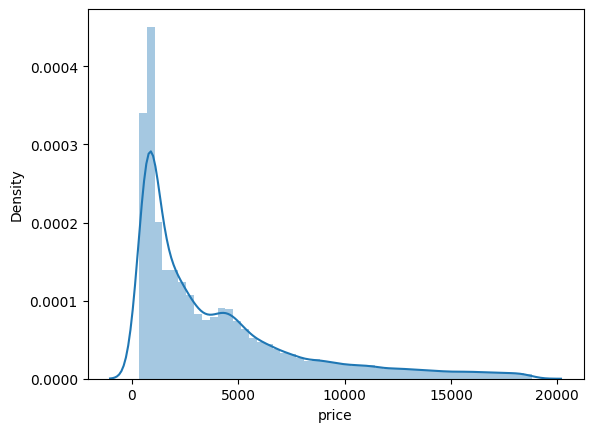

In [40]:
#----------Xem xét price của dmd bằng distplot và np.histogram-----------#
sbn.distplot(dmd.price);

In [41]:
np.histogram(dmd.price)

(array([25335,  9328,  7393,  3878,  2364,  1745,  1306,  1002,   863,
          726]),
 array([  326. ,  2175.7,  4025.4,  5875.1,  7724.8,  9574.5, 11424.2,
        13273.9, 15123.6, 16973.3, 18823. ]))

In [ ]:
#Đọc kết quả của np.histogram
#Nó sẽ  trả về  hai array, array đầu là số lượng quan sát có trong một khoảng gía trị, array hai là các khoảng giá trị được chia
# Ví dụ, có 25335 viên kim cương có giá trong khoảng 326 - 2175.7 USD
#        có 9328 viên kim cương có giá trong khoảng 2175.7 - 4025.4 USD
#        có 7393 viên kim cương có giá trong khoảng 4025.4 - 5875.1 USD
# cứ thế đọc tiếp